In [93]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import warnings
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
import arabic_reshaper
from bidi import algorithm 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report




## Read Datasetes

In [94]:
warnings.filterwarnings("ignore")
# read by default 1st sheet of an excel file
data1 = pd.read_excel('final-data.xlsx')
data1.head()

,سابقه,جنسیت,سال تولد,ماه تولد,سن,محل تولد,وضعیت تاهل,تعداد فرزند,پایان خدمت,مدرک تحصیلی,مقطع تحصیلی,قسمت,واحد,نوع قرارداد,شغل,گروه شغلی,پست سازمانی,صف/ستاد,حقوق,خروج
0,11242,مرد,1353,4,49,رزن,متاهل,2,معافيت پزشكي,راهنمايي,دوم راهنمايي,مديراداري و توسعه منابع انساني,رياست خدمات اداري و رفاه,رسمي,کارمند اداري 7,11,كارمند تشريفات,ستاد,C,no
1,10519,مرد,1349,6,53,لاهيجان,متاهل,2,خدمت كرده,ديپلم,ديپلم,مدير برنامه ريزي و انبارها,رياست انبارها,رسمي,کارمند اداري 7,11,سرپرست حمل و نقل محصول,صف,C,no
2,10512,مرد,1349,5,53,لاهيجان,متاهل,2,خدمت كرده,ديپلم,ديپلم,مدير برنامه ريزي و انبارها,رياست انبارها,رسمي,کارمند برنامه ريزي 7,11,كارشناس مسئول كنترل موجودي مواد,صف,C,no
3,10439,مرد,1351,6,51,تهران,متاهل,2,خدمت كرده,ابتدايي,پنجم ابتدايي,مدير برنامه ريزي و انبارها,رياست انبارها,رسمي,انباردار6,10,انباردار(انبار ضايعات),صف,C,no
4,10439,مرد,1353,9,49,تنكابن,متاهل,2,خدمت كرده,راهنمايي,دوم راهنمايي,مديرحراست,رياست حفاظت فيزيكي,قراردادي,مامورحفاظت فيزيکي 7,9,مامورحفاظت فيزيکي,ستاد,C,no


array([[<AxesSubplot: title={'center': 'سابقه'}>,
        <AxesSubplot: title={'center': 'سال تولد'}>],
       [<AxesSubplot: title={'center': 'ماه تولد'}>,
        <AxesSubplot: title={'center': 'سن'}>],
       [<AxesSubplot: title={'center': 'تعداد فرزند'}>,
        <AxesSubplot: title={'center': 'گروه شغلی'}>]], dtype=object)

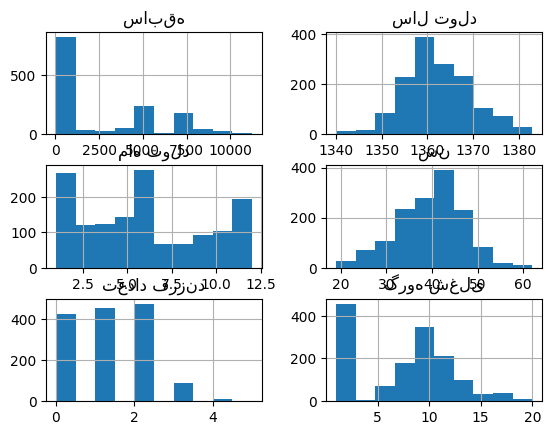

In [95]:
data1.hist()

In [96]:
# Count the number of null values in each column
null_counts = data1.isnull().sum()

# Print the null counts for each column
print(null_counts)

# Convert the null_counts Series to a DataFrame
null_counts_df = null_counts.to_frame('Null_Count')

# Save the results to an Excel file
null_counts_df.to_excel('null_counts.xlsx')

سابقه          0
جنسیت          0
سال تولد       0
ماه تولد       0
سن             0
محل تولد       0
وضعیت تاهل     0
تعداد فرزند    0
پایان خدمت     0
مدرک تحصیلی    0
مقطع تحصیلی    0
قسمت           0
واحد           0
نوع قرارداد    0
شغل            0
گروه شغلی      0
پست سازمانی    0
صف/ستاد        0
حقوق           0
خروج           0
dtype: int64


In [97]:
data1.describe()

,سابقه,سال تولد,ماه تولد,سن,تعداد فرزند,گروه شغلی
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2815.217720,1362.281593,5.980769,39.718407,1.182692,7.301511
std,3060.471885,7.323574,3.337124,7.323574,0.951542,4.920442
min,28.000000,1340.000000,1.000000,19.000000,0.000000,1.000000
25%,151.500000,1358.000000,3.000000,35.000000,0.000000,1.000000
50%,1065.000000,1361.000000,6.000000,41.000000,1.000000,9.000000
75%,5319.250000,1367.000000,9.000000,44.000000,2.000000,11.000000
max,11242.000000,1383.000000,12.000000,62.000000,5.000000,20.000000


In [98]:
data1.dtypes

سابقه           int64
جنسیت          object
سال تولد        int64
ماه تولد        int64
سن              int64
محل تولد       object
وضعیت تاهل     object
تعداد فرزند     int64
پایان خدمت     object
مدرک تحصیلی    object
مقطع تحصیلی    object
قسمت           object
واحد           object
نوع قرارداد    object
شغل            object
گروه شغلی       int64
پست سازمانی    object
صف/ستاد        object
حقوق           object
خروج           object
dtype: object

In [99]:
# Identify categorical columns
categorical_cols = data1.select_dtypes(include=['object']).columns

# Print the categorical columns
print("Categorical columns:", categorical_cols)

# Identify numerical columns
numerical_cols = data1.select_dtypes(include=['float64', 'int64']).columns

# Print the categorical columns
print("numerical columns:", numerical_cols)

Categorical columns: Index(['جنسیت', 'محل تولد', 'وضعیت تاهل', 'پایان خدمت', 'مدرک تحصیلی',
       'مقطع تحصیلی', 'قسمت', 'واحد', 'نوع قرارداد', 'شغل', 'پست سازمانی',
       'صف/ستاد', 'حقوق', 'خروج'],
      dtype='object')
numerical columns: Index(['سابقه', 'سال تولد', 'ماه تولد', 'سن', 'تعداد فرزند', 'گروه شغلی'], dtype='object')


## values

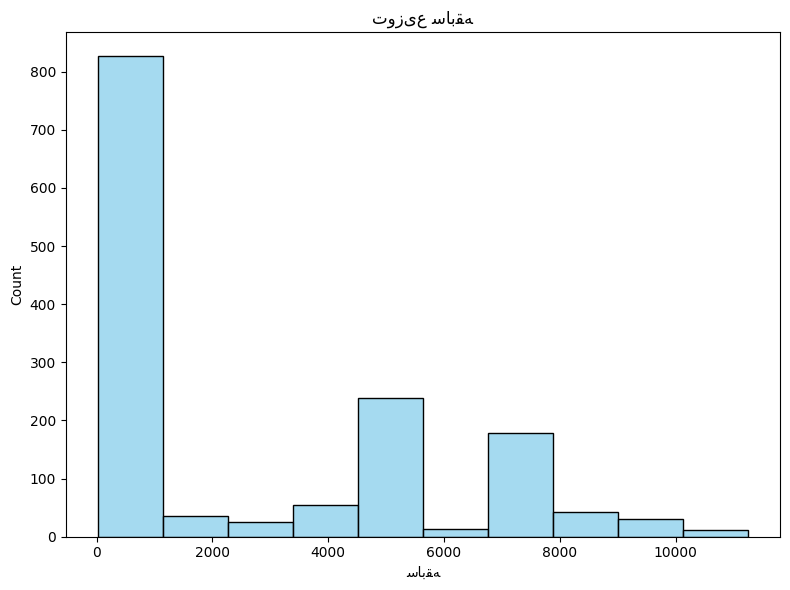

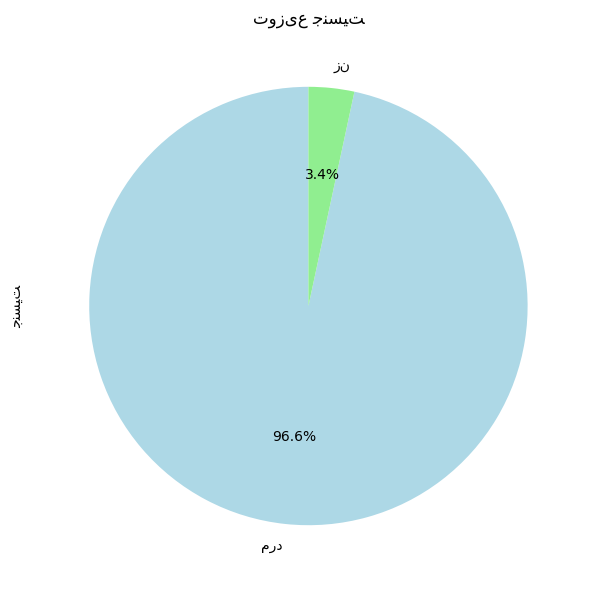

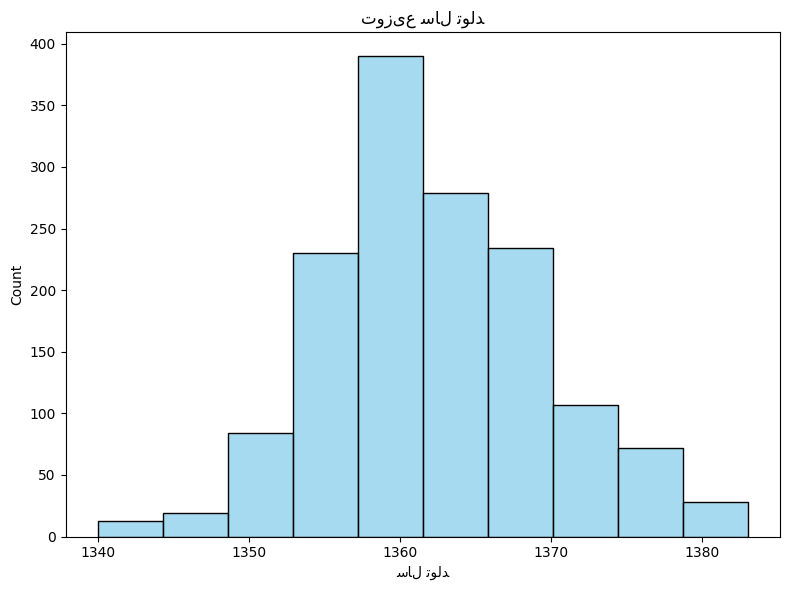

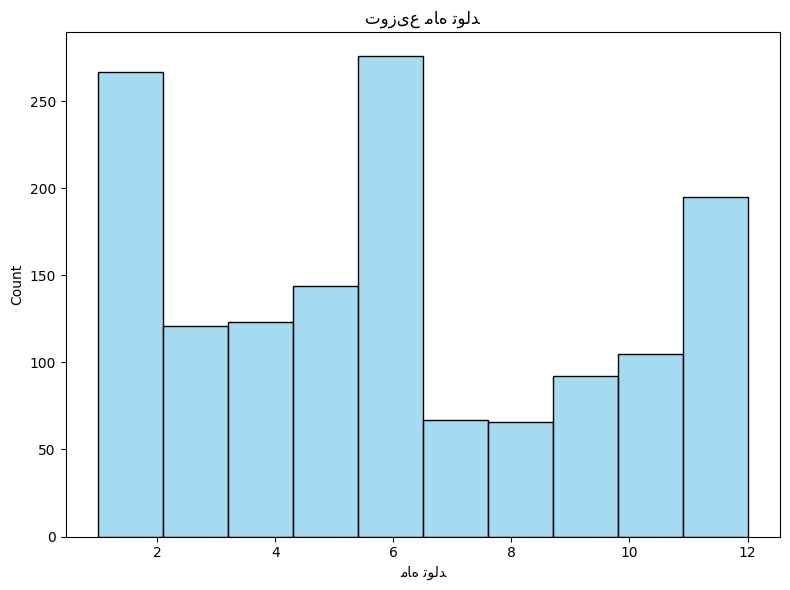

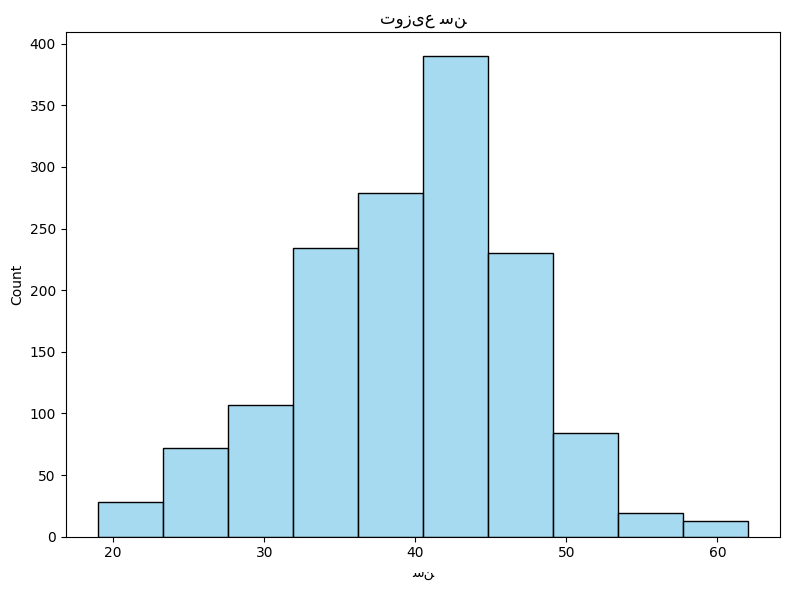

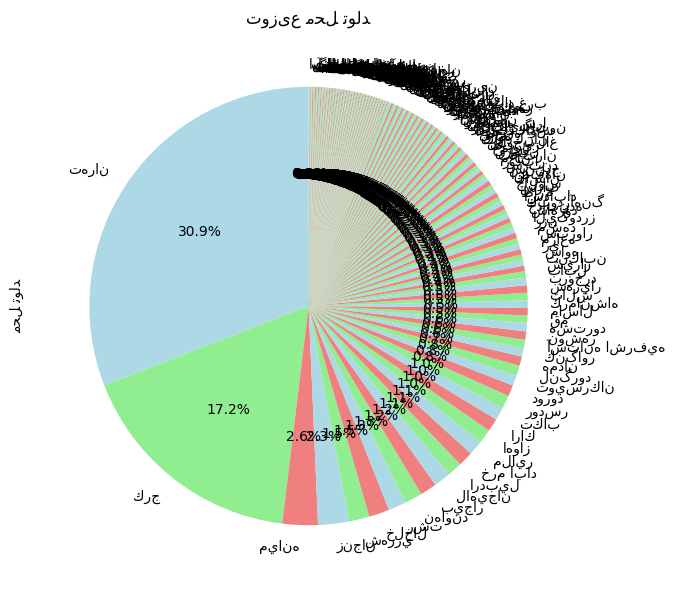

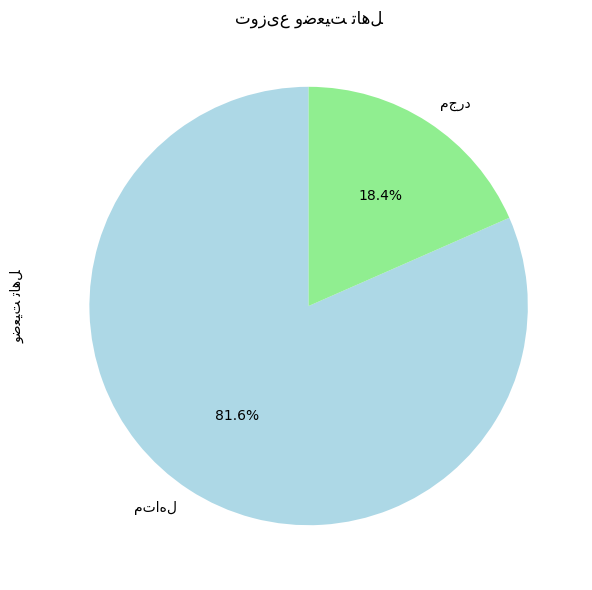

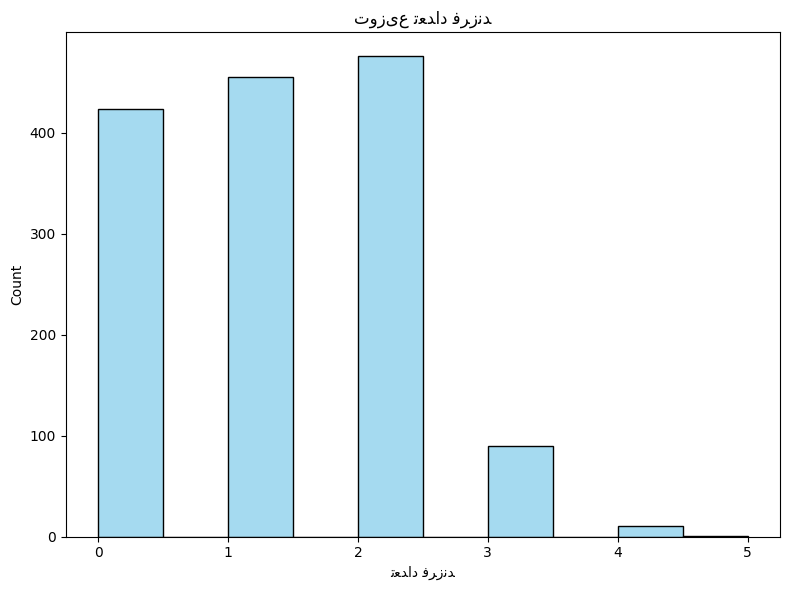

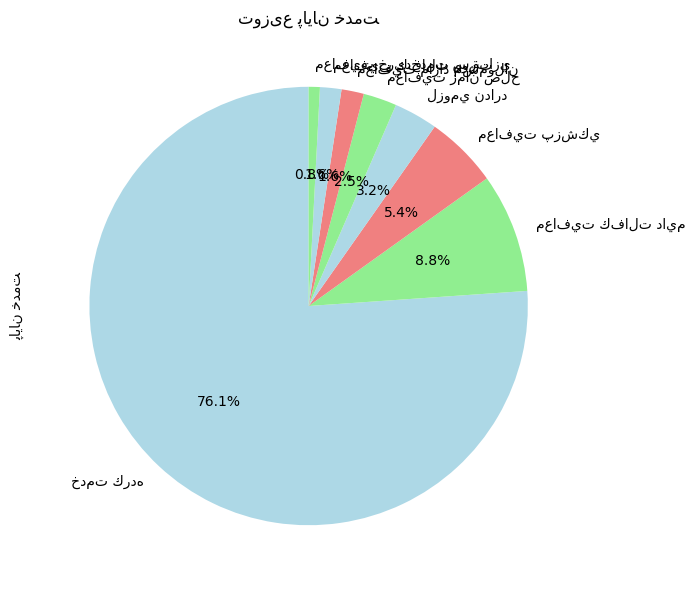

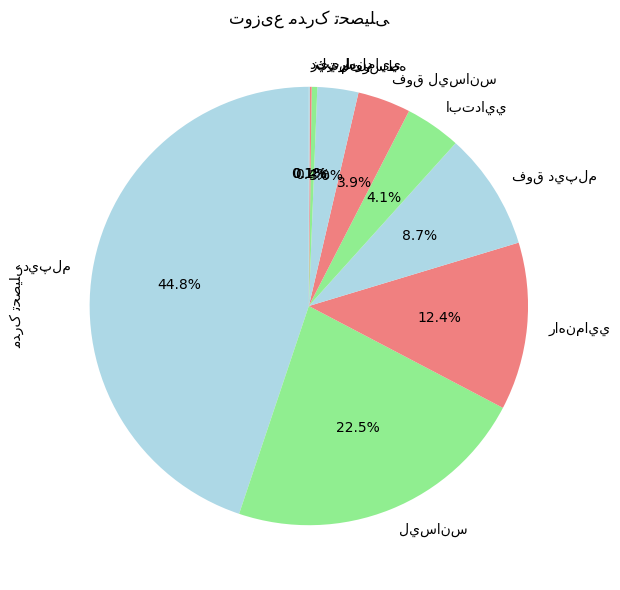

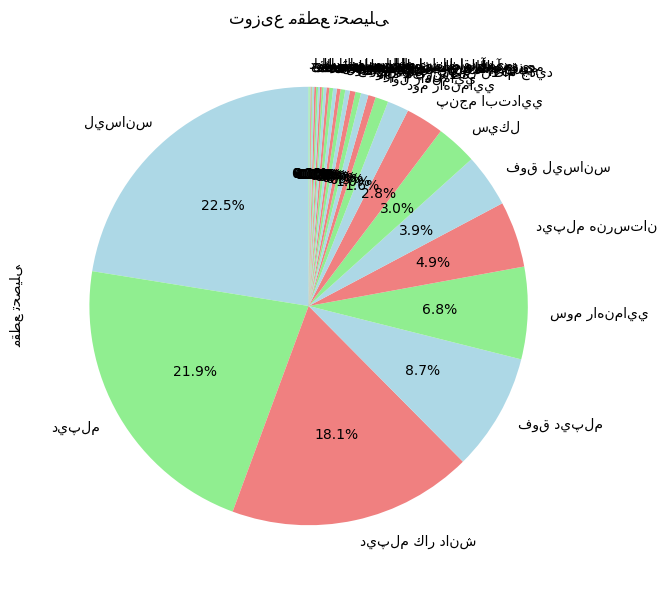

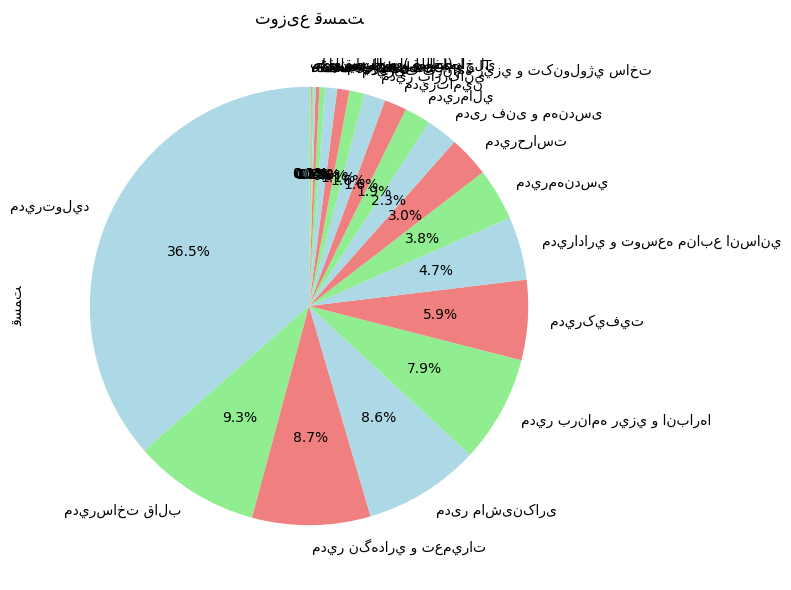

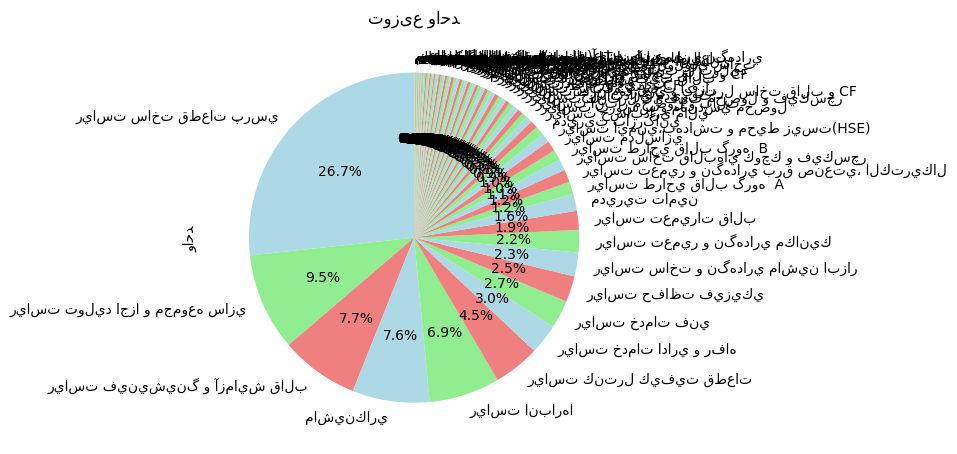

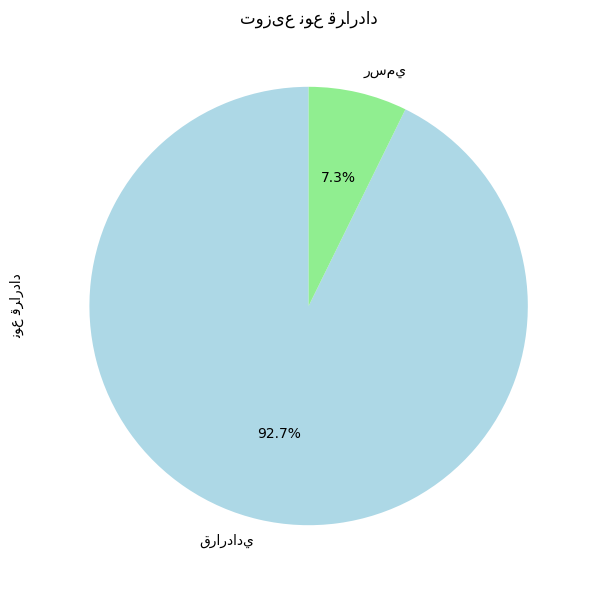

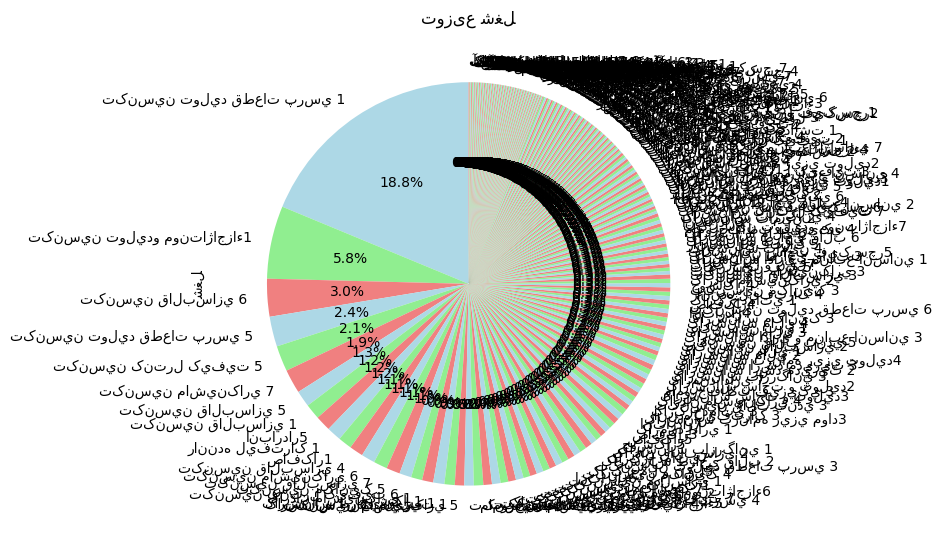

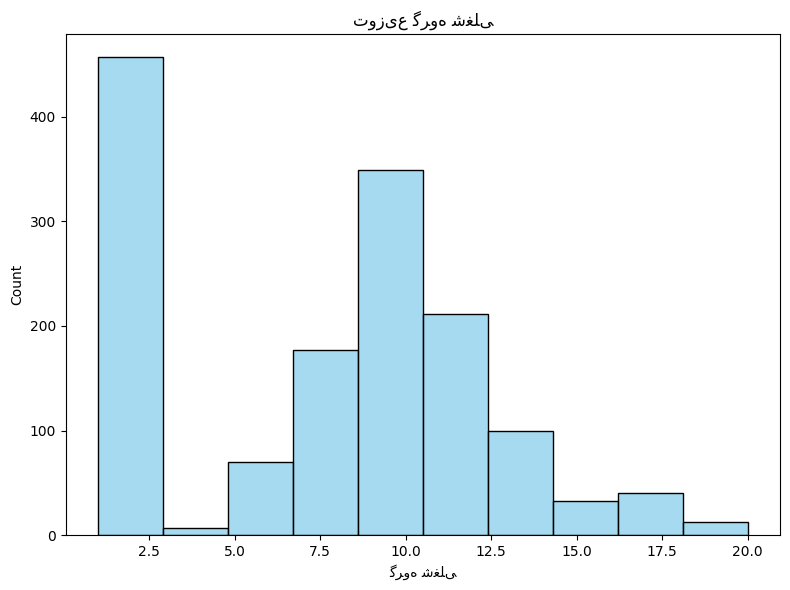

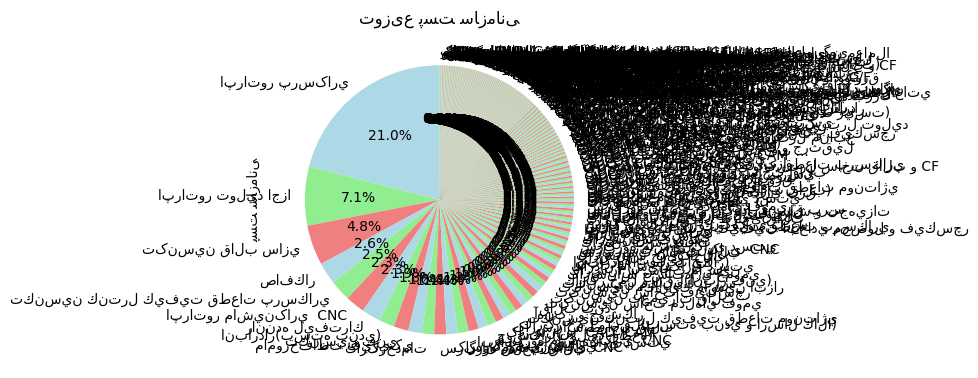

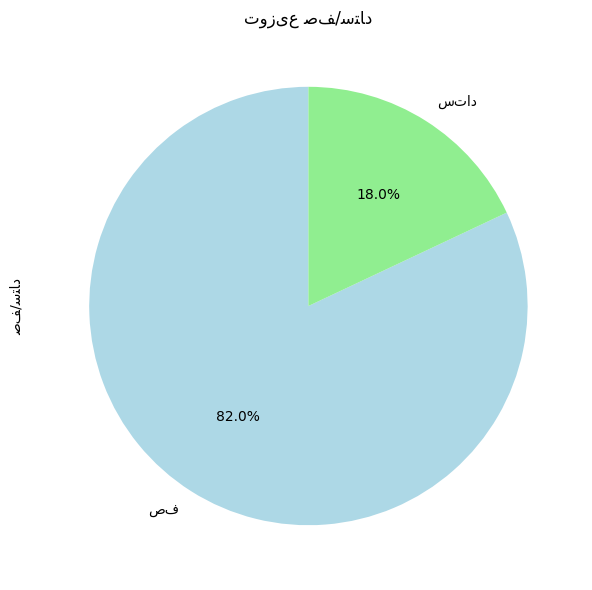

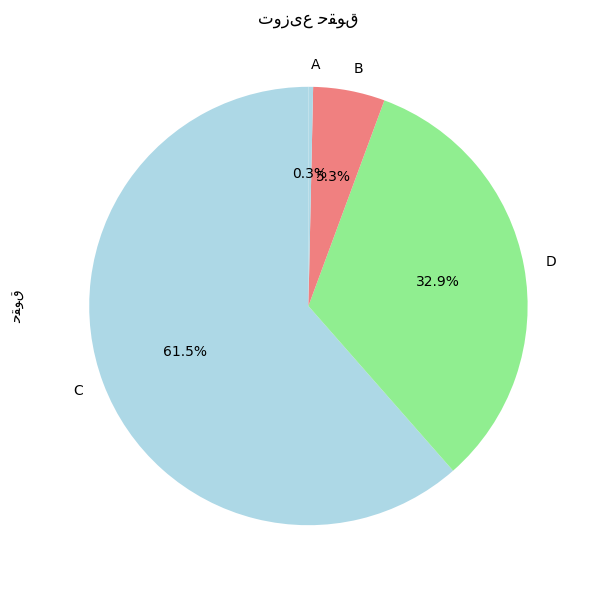

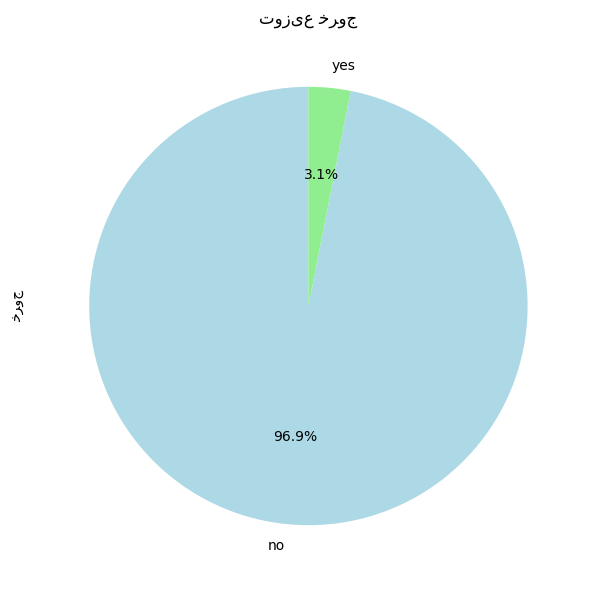

In [100]:
df = data1
df.columns = [arabic_reshaper.reshape(column) for column in data1.columns]
# Plotting value counts and distribution for each column separately
for col in df.columns:
    plt.figure(figsize=(8, 6))

    # Value Counts
   # plt.subplot(1, 2, 1)
    #df[col].value_counts().plot(kind='bar', color='skyblue')
    #plt.title(f'Value Counts for {col}')
    #plt.xlabel('Unique Values')
    #plt.ylabel('Count')

    # Distribution
    #plt.subplot(1, 2, 2)
    if df[col].dtype == 'object':
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
        plt.title(f'توزیع {arabic_reshaper.reshape(col)}')
    else:
        sns.histplot(df[col], color='skyblue', bins=10)
        plt.title(f'توزیع {arabic_reshaper.reshape(col)}')

    plt.tight_layout()
    plt.show()

## Null values

In [ ]:
# Handle missing values in categorical variables
for catcol in categorical_cols:
    #print(catcol)
    mode_value = data1[catcol].mode()[0]
    data1[catcol].fillna(mode_value, inplace=True)
# Calculate the mean of the numerical column with missing values
for numcol in numerical_cols:
    #print(numcol)
    mode_value = data1[numcol].mode()[0]
    #print(mode_value)
    data1[numcol].fillna(mode_value, inplace=True)

# Count the number of null values in each column
#null_counts = data1.isnull().sum()

# Print the null counts for each column
print(null_counts)

## Class Distribution

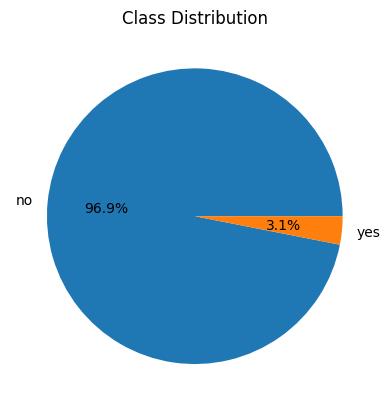

In [ ]:
import matplotlib.pyplot as plt
# Count the number of occurrences for each class
class_counts = data1['خروج'].value_counts()

# Create a pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Class Distribution')

# Display the chart
plt.show()


## value decsribe

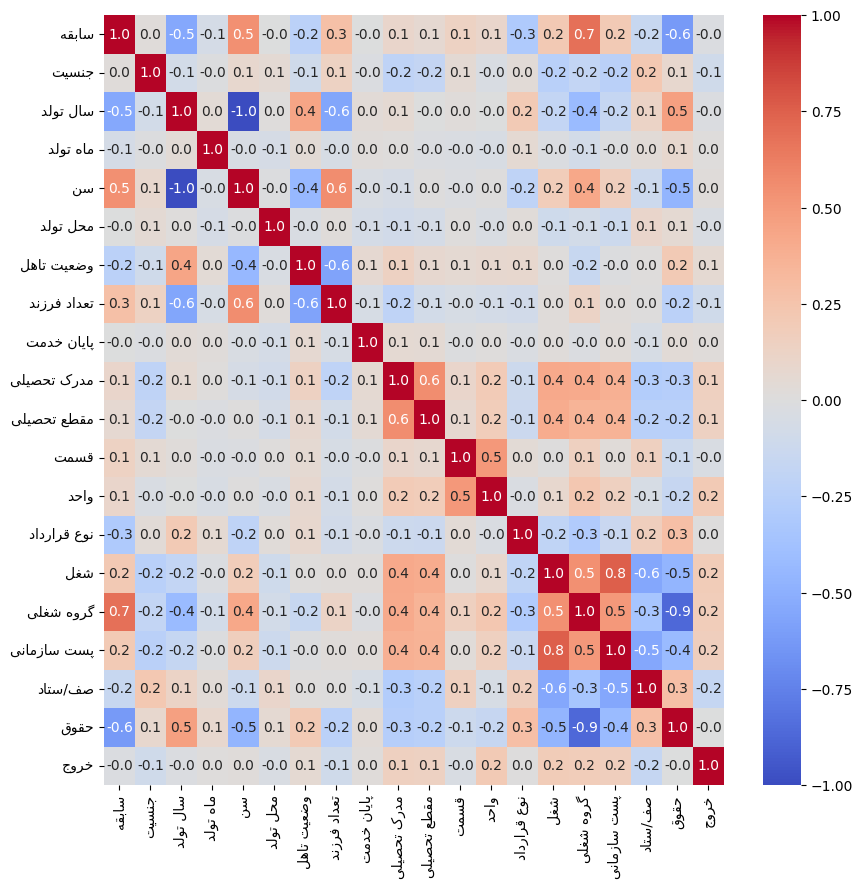

In [ ]:
#mearge features and target and plot correlation

data = pd.concat([features, pd.DataFrame(target, columns=['خروج'])], axis=1)
#change column names to persian
data.columns = [arabic_reshaper.reshape(column) for column in data.columns]
data.columns = [algorithm.get_display(column) for column in data.columns]
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f')
plt.show()


## Encode categorical variables

In [ ]:
# Encode categorical variables (if any)
encoder = LabelEncoder()
for catcol in categorical_cols:
   data1[catcol] = encoder.fit_transform(data1[catcol])

## Train & Test Split - Scale

In [ ]:
# Separate features and target variable
features = data1.drop('خروج', axis=1)
target = data1['خروج']
df_columns = features.columns


#features[numerical_cols] = scaler.fit_transform(features,numerical_cols)

#for numcol in numerical_cols:
    #data1[numcol] = scaler.fit_transform(df[[column_to_scale]])
 #   features[numcol] = scaler.fit_transform(features[[numcol]])


## Data importance

In [ ]:
#from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# تعیین مدل استخراج ویژگی
clf = DecisionTreeClassifier()

# انطباق مدل با داده‌های آموزشی
clf.fit(features, target)

# محاسبه اهمیت ویژگی ها
clf_importances = clf.feature_importances_

# Create a DataFrame with feature names and importances
clf_feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': clf_importances})


# Sort the features by importance in descending order
clf_feature_importances = clf_feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(clf_feature_importances)


# Save the results to an Excel file
clf_feature_importances.to_excel('clf_feature_importances.xlsx')

        Feature  Importance
12         واحد    0.390655
11         قسمت    0.122760
0         سابقه    0.116199
5      محل تولد    0.103488
16  پست سازمانی    0.091679
15    گروه شغلی    0.042664
18         حقوق    0.038126
10  مقطع تحصیلی    0.035071
7   تعداد فرزند    0.019315
4            سن    0.017941
14          شغل    0.014357
1         جنسیت    0.003874
3      ماه تولد    0.003870
8    پایان خدمت    0.000000
6    وضعیت تاهل    0.000000
13  نوع قرارداد    0.000000
2      سال تولد    0.000000
17      صف/ستاد    0.000000
9   مدرک تحصیلی    0.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest regressor model
rf_model = RandomForestRegressor()

# Fit the model to the data
rf_model.fit(features, target)

# Get feature importances
rf_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and importances
rf_feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': rf_importances})

# Sort the features by importance in descending order
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(rf_feature_importances)

# Save the results to an Excel file
rf_feature_importances.to_excel('rf_feature_importances.xlsx')


        Feature  Importance
12         واحد    0.369476
0         سابقه    0.139652
5      محل تولد    0.075426
16  پست سازمانی    0.055658
14          شغل    0.045326
15    گروه شغلی    0.040485
11         قسمت    0.038772
3      ماه تولد    0.037781
18         حقوق    0.036618
2      سال تولد    0.032399
4            سن    0.029522
10  مقطع تحصیلی    0.020953
7   تعداد فرزند    0.017291
6    وضعیت تاهل    0.015664
9   مدرک تحصیلی    0.014383
8    پایان خدمت    0.014371
1         جنسیت    0.007544
17      صف/ستاد    0.007420
13  نوع قرارداد    0.001262


In [ ]:
#حذف ویژگی بازگشتی
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


# Create the random forest classifier model
rfc_model = RandomForestClassifier()

# Create the RFE selector with the random forest classifier
rfe_selector = RFE(estimator=rfc_model, n_features_to_select=11, step=1)

# Fit the RFE selector to the data
rfe_selector.fit(features, target)

# Get the rankings of the features
feature_rankings = rfe_selector.ranking_

# Get the selected feature names
selected_features = features.columns[rfe_selector.support_]

# Print the selected features and their rankings
for feature, ranking in zip(selected_features, feature_rankings):
    print(f"{feature}: {ranking}")


سابقه: 1
سال تولد: 8
ماه تولد: 1
سن: 1
محل تولد: 1
قسمت: 1
واحد: 6
شغل: 3
گروه شغلی: 4
پست سازمانی: 5
حقوق: 2


In [ ]:
#درختان اضافی
from sklearn.ensemble import ExtraTreesClassifier

# Create the Extra Trees classifier model
et_model = ExtraTreesClassifier()

# Fit the model to the data
et_model.fit(features, target)

# Get feature importances
et_feature_importances = et_model.feature_importances_



# Create a DataFrame with feature names and importances
et_feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': et_feature_importances})

# Sort the features by importance in descending order
et_feature_importances = et_feature_importances.sort_values(by='Importance', ascending=False)

print(et_feature_importances)

# Save the results to an Excel file
et_feature_importances.to_excel('et_feature_importances.xlsx')

        Feature  Importance
12         واحد    0.130108
0         سابقه    0.081187
15    گروه شغلی    0.079858
18         حقوق    0.076803
14          شغل    0.068285
16  پست سازمانی    0.065328
4            سن    0.063311
11         قسمت    0.062112
3      ماه تولد    0.057616
2      سال تولد    0.056998
5      محل تولد    0.048226
8    پایان خدمت    0.037499
7   تعداد فرزند    0.034399
10  مقطع تحصیلی    0.032392
9   مدرک تحصیلی    0.030941
17      صف/ستاد    0.024146
6    وضعیت تاهل    0.021736
1         جنسیت    0.015611
13  نوع قرارداد    0.013445


In [ ]:
from scipy.stats import chi2_contingency

# Perform chi-square test for each feature
chi2_feature_importances = []
for feature in features.columns:
    contingency_table = pd.crosstab(features[feature], target)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_feature_importances.append(( chi2))

# Sort the feature importances by p-value in ascending order
#chi2_feature_importances.sort(key=lambda x: x[2])


# Print the feature importances
#for feature, chi2, p_value in chi2_feature_importances:
#    print(f"{feature}: Chi2={chi2}")

# Create a DataFrame with feature names and importances
chi2_feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': chi2_feature_importances})

# Sort the features by importance in descending order
chi2_feature_importances = chi2_feature_importances.sort_values(by='Importance', ascending=False)

print(chi2_feature_importances)

# Save the results to an Excel file
chi2_feature_importances.to_excel('chi2_feature_importances.xlsx')

        Feature   Importance
0         سابقه  1405.918828
12         واحد   737.077490
16  پست سازمانی   691.636610
14          شغل   574.654534
11         قسمت   200.683993
5      محل تولد   198.514734
15    گروه شغلی   135.212681
2      سال تولد    85.988089
4            سن    85.988089
10  مقطع تحصیلی    70.895193
9   مدرک تحصیلی    69.578789
17      صف/ستاد    36.865478
7   تعداد فرزند    15.811501
8    پایان خدمت    15.674096
1         جنسیت    11.200485
3      ماه تولد    10.255467
6    وضعیت تاهل     4.155665
18         حقوق     1.403320
13  نوع قرارداد     0.000000


In [ ]:
from sklearn.linear_model import Lasso


# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(features, target)

# Get the feature importance scores
l_feature_importances = np.abs(lasso.coef_)

# Create a DataFrame with feature names and importances
l_feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': l_feature_importances})

# Sort the features by importance in descending order
l_feature_importances = l_feature_importances.sort_values(by='Importance', ascending=False)

print(l_feature_importances)


        Feature  Importance
12         واحد    0.001924
14          شغل    0.000402
16  پست سازمانی    0.000044
0         سابقه    0.000004
10  مقطع تحصیلی    0.000000
17      صف/ستاد    0.000000
15    گروه شغلی    0.000000
13  نوع قرارداد    0.000000
11         قسمت    0.000000
9   مدرک تحصیلی    0.000000
1         جنسیت    0.000000
8    پایان خدمت    0.000000
7   تعداد فرزند    0.000000
6    وضعیت تاهل    0.000000
5      محل تولد    0.000000
4            سن    0.000000
3      ماه تولد    0.000000
2      سال تولد    0.000000
18         حقوق    0.000000


## SMOTE on Train data

In [ ]:
# Split the data into training and testing sets (optional),add stratify
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

In [ ]:
# Scale the numerical columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
print('No of ROWs before SMOTE')
print('y_train:\n',y_train.value_counts())
print('y_test:\n',y_test.value_counts())

No of ROWs before SMOTE
y_train:
 0    988
1     31
Name: خروج, dtype: int64
y_test:
 0    423
1     14
Name: خروج, dtype: int64


In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.033)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

In [ ]:
print('No of ROWs after SMOTE')
print('y_train:\n',y_train_s.value_counts())
print('y_train:\n',y_test.value_counts())

No of ROWs after SMOTE
y_train:
 0    988
1     32
Name: خروج, dtype: int64
y_train:
 0    423
1     14
Name: خروج, dtype: int64


In [ ]:
features

,سابقه,جنسیت,سال تولد,ماه تولد,سن,محل تولد,وضعیت تاهل,تعداد فرزند,پایان خدمت,مدرک تحصیلی,مقطع تحصیلی,قسمت,واحد,نوع قرارداد,شغل,گروه شغلی,پست سازمانی,صف/ستاد,حقوق
0,11242,1,1353,4,49,77,0,2,7,4,11,9,22,0,244,11,185,0,2
1,10519,1,1349,6,53,145,0,2,0,3,14,6,6,0,244,11,92,1,2
2,10512,1,1349,5,53,145,0,2,0,3,14,6,6,0,249,11,179,1,2
3,10439,1,1351,6,51,54,0,2,0,0,29,6,6,0,6,10,2,1,2
4,10439,1,1353,9,49,53,0,2,0,4,11,12,21,1,105,9,193,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,132,0,1373,11,29,54,1,0,1,8,27,16,54,1,206,11,246,1,2
1452,124,1,1374,9,28,24,1,0,3,8,27,13,51,1,127,9,229,1,3
1453,133,1,1368,11,34,54,1,0,5,8,27,16,54,1,206,11,231,1,2
1454,53,1,1356,3,46,54,0,1,7,0,29,11,50,1,30,1,5,1,3


## k-fold


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report


# Initialize the RandomForestClassifier

# Initialize StratifiedKFold with 5 folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("LGBMClassifier")
# Perform k-fold cross-validation and generate classification report for each fold
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(features, target), 1):
    X_train, X_test = features.loc[train_idx], features.loc[test_idx]
    y_train, y_test = target.loc[train_idx], target.loc[test_idx]
    
    sm = SMOTE(sampling_strategy=0.062)
    X_train_s, y_train_s = sm.fit_resample(X_train, y_train)
    rf_clf = lgb.LGBMClassifier(random_state=42)
    rf_clf.fit(X_train_s, y_train_s)
    y_pred = rf_clf.predict(X_test)
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for Fold {fold_idx}:')
    print(class_report)


LGBMClassifier
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 69, number of negative: 1128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 1197, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.057644 -> initscore=-2.794095
[LightGBM] [Info] Start training from score -2.794095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report


# Initialize the RandomForestClassifier

# Initialize StratifiedKFold with 5 folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("XGBClassifier")
# Perform k-fold cross-validation and generate classification report for each fold
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(features, target), 1):
    X_train, X_test = features.loc[train_idx], features.loc[test_idx]
    y_train, y_test = target.loc[train_idx], target.loc[test_idx]
    
    sm = SMOTE(sampling_strategy=0.062)
    X_train_s, y_train_s = sm.fit_resample(X_train, y_train)
    rf_clf = XGBClassifier(random_state=42)
    rf_clf.fit(X_train_s, y_train_s)
    y_pred = rf_clf.predict(X_test)
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for Fold {fold_idx}:')
    print(class_report)


XGBClassifier
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       283
           1       0.67      0.44      0.53         9

    accuracy                           0.98       292
   macro avg       0.82      0.72      0.76       292
weighted avg       0.97      0.98      0.97       292

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       282
           1       0.57      0.44      0.50         9

    accuracy                           0.97       291
   macro avg       0.78      0.72      0.74       291
weighted avg       0.97      0.97      0.97       291

Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       282
           1       1.00      0.22      0.36         9

    accuracy                           0.98       291
   macro avg

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report


# Initialize the RandomForestClassifier

# Initialize StratifiedKFold with 5 folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("RandomForestClassifier")

# Perform k-fold cross-validation and generate classification report for each fold
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(features, target), 1):
    X_train, X_test = features.loc[train_idx], features.loc[test_idx]
    y_train, y_test = target.loc[train_idx], target.loc[test_idx]
    
    sm = SMOTE(sampling_strategy=0.062)
    X_train_s, y_train_s = sm.fit_resample(X_train, y_train)
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train_s, y_train_s)
    y_pred = rf_clf.predict(X_test)
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for Fold {fold_idx}:')
    print(class_report)


RandomForestClassifier
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       283
           1       0.67      0.22      0.33         9

    accuracy                           0.97       292
   macro avg       0.82      0.61      0.66       292
weighted avg       0.97      0.97      0.97       292

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       282
           1       0.50      0.11      0.18         9

    accuracy                           0.97       291
   macro avg       0.74      0.55      0.58       291
weighted avg       0.96      0.97      0.96       291

Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       282
           1       1.00      0.22      0.36         9

    accuracy                           0.98       291
   

## All Models

In [103]:


# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    # disp.plot()
    # plt.show()

    print(model.__class__.__name__)
    # Print the classification report
    print(classification_report(y_test, y_pred))
    print('confusion_matrix')
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    print(cm)



# Repeat all the above models with resampled data
models = [
    RandomForestClassifier(),
    LogisticRegression(),
    GaussianNB(),
    BernoulliNB(),
    #LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    LinearSVC(C=1.0, random_state=42),
    lgb.LGBMClassifier(random_state=42),
    CatBoostClassifier(random_state=42, verbose=False),
    XGBClassifier(random_state=42, verbosity=0),
    MLPClassifier(random_state=42, max_iter=500)
]

# Train and evaluate each model with resampled data
for model in models:
    train_and_evaluate_model(model, X_train_s, y_train_s, X_test, y_test)

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       282
           1       0.50      0.11      0.18         9

    accuracy                           0.97       291
   macro avg       0.74      0.55      0.58       291
weighted avg       0.96      0.97      0.96       291

confusion_matrix
[[281   1]
 [  8   1]]
LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       282
           1       0.27      0.33      0.30         9

    accuracy                           0.95       291
   macro avg       0.63      0.65      0.64       291
weighted avg       0.96      0.95      0.95       291

confusion_matrix
[[274   8]
 [  6   3]]
GaussianNB
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       282
           1       0.21      0.89      0.33         9

    accuracy                           0.89      

## SMOTE after delete unimportant feature

In [ ]:
im_features = features.drop('نوع قرارداد', axis=1)

# Split the data into training and testing sets (optional),add stratify
from sklearn.model_selection import train_test_split
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(im_features, target, test_size=0.2, random_state=42, stratify=target)

In [ ]:
print('No of ROWs before SMOTE')
print('y_train_im:\n',y_train_im.value_counts())
print('y_test_im:\n',y_test_im.value_counts())

No of ROWs before SMOTE
y_train_im:
 0    985
1     59
Name: خروج, dtype: int64
y_test_im:
 0    423
1     25
Name: خروج, dtype: int64


In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm_im = SMOTE(sampling_strategy=0.062)
X_train_im_s, y_train_im_s = sm.fit_resample(X_train_im, y_train_im)

In [ ]:
print('No of ROWs after SMOTE')
print('y_train_im_s:\n',y_train_im_s.value_counts())
print('y_train:\n',y_test.value_counts())

No of ROWs after SMOTE
y_train_im_s:
 0    985
1     61
Name: خروج, dtype: int64
y_train:
 0    282
1     17
Name: خروج, dtype: int64


In [ ]:

# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    # Print the classification report
    print(classification_report(y_test, y_pred))

    print('confusion_matrix')
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    print(cm)

# Repeat all the above models with resampled data
models = [
    RandomForestClassifier(),
    LogisticRegression(),
    GaussianNB(),
    BernoulliNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    LinearSVC(C=1.0, random_state=42),
    lgb.LGBMClassifier(random_state=42),
    CatBoostClassifier(random_state=42, verbose=False),
    XGBClassifier(random_state=42, verbosity=0),
    MLPClassifier(random_state=42, max_iter=500)
]

# Train and evaluate each model with resampled data
for model in models:
    train_and_evaluate_model(model, X_train_im_s, y_train_im_s, X_test_im, y_test_im)


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       423
           1       1.00      0.68      0.81        25

    accuracy                           0.98       448
   macro avg       0.99      0.84      0.90       448
weighted avg       0.98      0.98      0.98       448

confusion_matrix
[[423   0]
 [  8  17]]
LogisticRegression
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       423
           1       0.15      0.08      0.11        25

    accuracy                           0.92       448
   macro avg       0.55      0.53      0.53       448
weighted avg       0.90      0.92      0.91       448

confusion_matrix
[[412  11]
 [ 23   2]]
GaussianNB
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       423
           1       0.26      0.68      0.37        25

    accuracy                           0.87      

## SECOND Dataset

In [ ]:
data2 = pd.read_excel('tina6.xlsx')
data2.head()

,سابقه,جنسیت,سن,تعداد فرزند,وضعیت تاهل,پایان خدمت,مدرک تحصیلی,واحد,نوع قرارداد,گروه شغلی,رتبه حقوق,صف/ستاد,خروج
0,18,مرد,45,2,متاهل,معاف,فوق ليسانس,تعمیر و نگهداری,قراردادی,15,A,ستاد,no
1,5,زن,35,0,مجرد,لزومي ندارد,ليسانس,تضمين کيفيت,قراردادی,13,A,ستاد,no
2,11,مرد,44,2,متاهل,پایان خدمت,زیر دیپلم,اداری,قراردادی,4,B,ستاد,no
3,23,مرد,45,2,متاهل,پایان خدمت,ديپلم,برنامه ریزی,قراردادی,12,B,صف,no
4,23,مرد,47,2,متاهل,پایان خدمت,ديپلم,بازرگانی,قراردادی,12,B,ستاد,no


In [ ]:
# Count the number of null values in each column
null_counts = data2.isnull().sum()

# Print the null counts for each column
print(null_counts)

# Convert the null_counts Series to a DataFrame
null_counts_df = null_counts.to_frame('Null_Count')

# Save the results to an Excel file
null_counts_df.to_excel('null_counts.xlsx')

سابقه          0
جنسیت          0
سن             0
تعداد فرزند    0
وضعیت تاهل     0
پایان خدمت     0
مدرک تحصیلی    0
واحد           0
نوع قرارداد    0
گروه شغلی      0
رتبه حقوق      0
صف/ستاد        0
خروج           0
dtype: int64


In [ ]:
# Identify categorical columns
categorical_cols2 = data2.select_dtypes(include=['object']).columns

# Print the categorical columns
print("Categorical columns:", categorical_cols2)

# Identify numerical columns
numerical_cols2 = data2.select_dtypes(include=['float64', 'int64']).columns

# Print the categorical columns
print("numerical columns:", numerical_cols2)

Categorical columns: Index(['جنسیت', 'وضعیت تاهل', 'پایان خدمت', 'مدرک تحصیلی', 'واحد',
       'نوع قرارداد', 'رتبه حقوق', 'صف/ستاد', 'خروج'],
      dtype='object')
numerical columns: Index(['سابقه', 'سن', 'تعداد فرزند', 'گروه شغلی'], dtype='object')


In [ ]:
# Encode categorical variables (if any)
encoder2 = LabelEncoder()
for catcol2 in categorical_cols2:
   data2[catcol2] = encoder2.fit_transform(data2[catcol2])

In [ ]:
# Separate features and target variable
features2 = data2.drop('خروج', axis=1)
target2 = data2['خروج']
df_columns2 = features2.columns

# Scale the numerical columns
scaler2 = StandardScaler()
#features[numerical_cols] = scaler.fit_transform(features,numerical_cols)

for numcol2 in numerical_cols2:
    #data1[numcol] = scaler.fit_transform(df[[column_to_scale]])
    features2[numcol2] = scaler2.fit_transform(features2[[numcol2]])

In [ ]:
features2

,سابقه,جنسیت,سن,تعداد فرزند,وضعیت تاهل,پایان خدمت,مدرک تحصیلی,واحد,نوع قرارداد,گروه شغلی,رتبه حقوق,صف/ستاد
0,2.299514,1,1.600242,1.639499,0,2,3,4,1,2.403503,0,0
1,-0.109657,0,0.032469,-0.823393,1,1,4,3,1,1.821983,0,0
2,1.002268,1,1.443465,1.639499,0,3,1,0,1,-0.794859,1,0
3,3.226118,1,1.600242,1.639499,0,3,0,2,1,1.531223,1,1
4,3.226118,1,1.913797,1.639499,0,3,0,1,1,1.531223,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
164,-0.850941,1,-0.281086,-0.823393,1,3,4,4,1,1.240462,2,0
165,-0.850941,1,-1.064973,1.639499,0,3,1,5,1,-0.794859,2,1
166,-0.850941,1,-0.751418,0.408053,0,3,0,6,1,-0.794859,2,0
167,-0.850941,1,0.502801,0.408053,0,3,1,5,1,-0.794859,2,1


In [ ]:
# Train the model
#X_train_s, y_train_s, X_test, y_test
model2 = XGBClassifier(random_state=42, verbosity=0)
model2.fit(X_train_s, y_train_s)
    
# Make predictions on the test set
y_pred2 = model2.predict(X_test)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
# disp.plot()
# plt.show()

print(model2.__class__.__name__)
# Print the classification report
print(classification_report(y_test, y_pred2))
print('confusion_matrix')
cm = confusion_matrix(y_test, y_pred2, labels=model2.classes_)
print(cm)

XGBClassifier
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       423
           1       0.71      0.68      0.69        25

    accuracy                           0.97       448
   macro avg       0.84      0.83      0.84       448
weighted avg       0.97      0.97      0.97       448

confusion_matrix
[[416   7]
 [  8  17]]


In [ ]:
y_tina_predict = model2.predict(features2)

In [ ]:
print(model2.__class__.__name__)
# Print the classification report
print(classification_report(target2, y_tina_predict))
print('confusion_matrix')
cm = confusion_matrix(target2, y_tina_predict, labels=model2.classes_)
print(cm)

XGBClassifier
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       155
           1       0.00      0.00      0.00        14

    accuracy                           0.92       169
   macro avg       0.46      0.50      0.48       169
weighted avg       0.84      0.92      0.88       169

confusion_matrix
[[155   0]
 [ 14   0]]


## *********

## Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the accuracy of the model
#accuracy = accuracy_score(y_test, predictions)
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.98      1.00      0.99       284
           1       1.00      0.45      0.62        11

    accuracy                           0.98       295
   macro avg       0.99      0.73      0.81       295
weighted avg       0.98      0.98      0.98       295



In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the accuracy of the model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

print(logreg_accuracy)
#classification_report
print(classification_report(y_test, logreg_predictions))


0.9559322033898305
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       284
           1       0.25      0.09      0.13        11

    accuracy                           0.96       295
   macro avg       0.61      0.54      0.56       295
weighted avg       0.94      0.96      0.95       295



## Gaussian Naive Bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB


# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# You can also use other metrics for evaluation
# e.g., confusion matrix, precision, recall, etc.
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_matrix}')
#classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.9220338983050848
Confusion Matrix:
[[268  16]
 [  7   4]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       284
           1       0.20      0.36      0.26        11

    accuracy                           0.92       295
   macro avg       0.59      0.65      0.61       295
weighted avg       0.95      0.92      0.93       295



## BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
# Create a Bernoulli Naive Bayes model
model = BernoulliNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# You can also use other metrics for evaluation
# e.g., confusion matrix, precision, recall, etc.
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_matrix}')
#classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.9457627118644067
Confusion Matrix:
[[278   6]
 [ 10   1]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       284
           1       0.14      0.09      0.11        11

    accuracy                           0.95       295
   macro avg       0.55      0.53      0.54       295
weighted avg       0.93      0.95      0.94       295



## Logistic Regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# You can also use other metrics for evaluation
# e.g., confusion matrix, precision, recall, etc.
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_matrix}')
#classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.9559322033898305
Confusion Matrix:
[[281   3]
 [ 10   1]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       284
           1       0.25      0.09      0.13        11

    accuracy                           0.96       295
   macro avg       0.61      0.54      0.56       295
weighted avg       0.94      0.96      0.95       295



## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# You can also use other metrics for evaluation
# e.g., confusion matrix, precision, recall, etc.
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_matrix}')
#classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.9491525423728814
Confusion Matrix:
[[276   8]
 [  7   4]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       284
           1       0.33      0.36      0.35        11

    accuracy                           0.95       295
   macro avg       0.65      0.67      0.66       295
weighted avg       0.95      0.95      0.95       295



## svm 

In [ ]:
from sklearn.svm import SVC
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# You can also use other metrics for evaluation
# e.g., confusion matrix, precision, recall, etc.
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_matrix}')
#classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.9525423728813559
Confusion Matrix:
[[277   7]
 [  7   4]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       284
           1       0.36      0.36      0.36        11

    accuracy                           0.95       295
   macro avg       0.67      0.67      0.67       295
weighted avg       0.95      0.95      0.95       295



## LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
# Create a Linear Support Vector Machines (LSVM) model
model = LinearSVC(C=1.0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# You can also use other metrics for evaluation
# e.g., confusion matrix, precision, recall, etc.
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_matrix}')
#classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.9288135593220339
Confusion Matrix:
[[268  16]
 [  5   6]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       284
           1       0.27      0.55      0.36        11

    accuracy                           0.93       295
   macro avg       0.63      0.74      0.66       295
weighted avg       0.96      0.93      0.94       295



## lgb

In [ ]:
import lightgbm as lgb
# Create a LightGBM model
model = lgb.LGBMClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#classification_report
print(classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 56, number of negative: 1136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.046980 -> initscore=-3.009917
[LightGBM] [Info] Start training from score -3.009917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

## catboost

In [ ]:
#!pip install catboost

In [ ]:
#catboost
from catboost import CatBoostClassifier
# Create a CatBoost model
model = CatBoostClassifier(random_state=42, verbose=False)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       284
           1       1.00      0.36      0.53        11

    accuracy                           0.98       295
   macro avg       0.99      0.68      0.76       295
weighted avg       0.98      0.98      0.97       295



## XGBClassifier

In [ ]:
#xgboost
from xgboost import XGBClassifier
# Create an XGBoost model
model = XGBClassifier(random_state=42, verbosity=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       284
           1       0.78      0.64      0.70        11

    accuracy                           0.98       295
   macro avg       0.88      0.81      0.84       295
weighted avg       0.98      0.98      0.98       295



## MLPClassifier

In [ ]:
#mlp
from sklearn.neural_network import MLPClassifier
# Create an MLP model
model = MLPClassifier(random_state=42, max_iter=500)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       284
           1       1.00      0.18      0.31        11

    accuracy                           0.97       295
   macro avg       0.98      0.59      0.65       295
weighted avg       0.97      0.97      0.96       295

